**Uploding test.csv & train.csv Files in Google Colab.**

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


****

**Importing the data.**

In [8]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
X=train.iloc[:,1:785]
y=train.iloc[:,0]
# Checking Labels
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


**Splitting data into test and train data.**

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Coverting data into numpy array.**

In [10]:
X_train=X_train.to_numpy().reshape(-1,28,28)
X_test=X_test.to_numpy().reshape(-1,28,28)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

**Adding dimension to the data & Normalisation of values.**

In [11]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_test=X_test/(255)
X_train=X_train/(255)

**One hot encoding the values.**

In [12]:
import pandas as pd
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

**Structuring Model layer by layer & compiling it.**

In [13]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,840 (479.84 KB)

 Trainable params: 122,840 (479.84 KB)

 Non-trainable params: 0 (0.00 B)

**Fitting data into model.**

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64,validation_data=(X_test, y_test))

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.2623 - loss: 2.5037 - val_accuracy: 0.7780 - val_loss: 0.7256
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8524 - loss: 0.5220 - val_accuracy: 0.9465 - val_loss: 0.2358
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9594 - loss: 0.1781 - val_accuracy: 0.9903 - val_loss: 0.0760
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9927 - loss: 0.0608 - val_accuracy: 0.9975 - val_loss: 0.0379
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9986 - loss: 0.0249 - val_accuracy: 0.9995 - val_loss: 0.0145
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9998 - loss: 0.0133 - val_accuracy: 0.9996 - val_loss: 0.0095
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9999 - loss: 0.0069 - val_accuracy: 0.9993 - val_loss: 0.0074
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9982 - loss: 0.0124 - 

**Plotting accuracy metrics.**

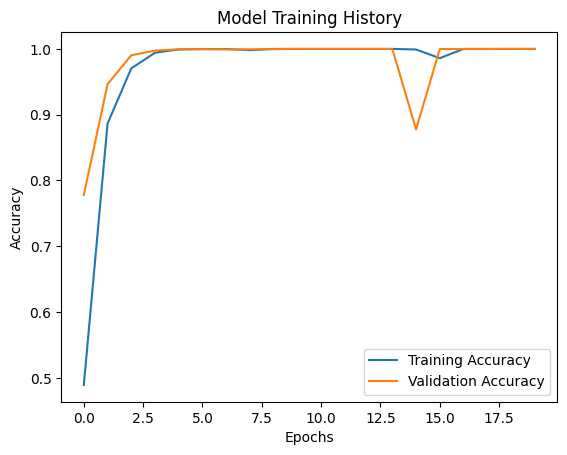

In [15]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

**Predicting values using test data.**

In [16]:
import numpy as np
test=pd.read_csv('test.csv')
X_test_1=test.iloc[:,1:785]
X_test_1=(X_test_1.to_numpy().reshape(-1,28,28,1))/255 # Normalisation and reshaping
print(X_test_1.shape)
Y_pred=model.predict(X_test_1).argmax(axis=1)
print(Y_pred)
print(model.predict(X_test_1).shape)
# **Label 9 is missing**
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
y_pred_labels = [labels[x] for x in Y_pred]


(7172, 28, 28, 1)
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
[6 5 9 ... 2 4 2]
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(7172, 24)


**Creating Submission file and downloading it.**

In [17]:
submission=pd.DataFrame({'id':range(len(y_pred_labels)),'label':y_pred_labels})
submission.to_csv('submission.csv',index=False)
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>